# **Test Technique**

In [42]:
from dotenv import load_dotenv
import os
import requests
import sys
import json

### Charger les data contenues dans le .env

In [43]:
load_dotenv()

True

### Jeton d'accès

In [86]:
client_id = os.getenv("SPOTIFY_CLIENT_ID")
client_secret = os.getenv("SPOTIFY_CLIENT_SECRET")

token_resp = requests.post(
    "https://accounts.spotify.com/api/token",
    data={"grant_type": "client_credentials"},
    auth=(client_id, client_secret)
)
token_resp.raise_for_status()
access_token = token_resp.json().get("access_token")
print("Jeton d'accès :", access_token)

Jeton d'accès : BQAazmphGYtn29e4416NBThjXMbXWLoCeB_1gCQv7PJwUbXsXj8OqtR5T29v0PuLiRGU7DOP9QtOSlcY809pNizjEKTyqtLvuo5yX67VKNGwUb_hiaGBk_BePm8ow70Em95YnMru1VA


### Etude de l'API

#### Tracks

In [4]:
url = "https://api.spotify.com/v1/search"
headers = {"Authorization": f"Bearer {access_token}"}
params = {"q": "Bad Liar", "type": "track", "limit": 1}

response = requests.get(url, headers=headers, params=params)
track_result = response.json()

# Récupération des items (liste de morceaux)
tracks = track_result.get("tracks", {}).get("items", [])


if tracks:  # vérifier que la liste n'est pas vide
    track = tracks[0]  # prendre le premier élément
    for key, value in track.items():
        print(key, ":", type(value))
else:
    print("Aucun morceau trouvé.")


album : <class 'dict'>
artists : <class 'list'>
available_markets : <class 'list'>
disc_number : <class 'int'>
duration_ms : <class 'int'>
explicit : <class 'bool'>
external_ids : <class 'dict'>
external_urls : <class 'dict'>
href : <class 'str'>
id : <class 'str'>
is_local : <class 'bool'>
is_playable : <class 'bool'>
name : <class 'str'>
popularity : <class 'int'>
preview_url : <class 'NoneType'>
track_number : <class 'int'>
type : <class 'str'>
uri : <class 'str'>


In [5]:
from pprint import pprint
pprint(track_result, compact=False, depth=3)

{'tracks': {'href': 'https://api.spotify.com/v1/search?offset=0&limit=1&query=Bad%20Liar&type=track',
            'items': [{...}],
            'limit': 1,
            'next': 'https://api.spotify.com/v1/search?offset=1&limit=1&query=Bad%20Liar&type=track',
            'offset': 0,
            'previous': None,
            'total': 1000}}


#### Artiste

In [6]:
url = "https://api.spotify.com/v1/search"
headers = {"Authorization": f"Bearer {access_token}"}
params = {"q": "Imagine Dragons", "type": "artist", "limit": 1}

response = requests.get(url, headers=headers, params=params)
artists_result = response.json()

# Récupération des items (liste d'artistes)
artistes = artists_result.get("artists", {}).get("items", [])

if artistes:  # vérifier que la liste n'est pas vide
    artiste = artistes[0]  # prendre le premier élément
    print(f"Artiste choisi : {artiste.get('name')}")
    for key, value in artiste.items():
        print(key, ":", type(value))
else:
    print("Aucun artiste trouvé.")


Artiste choisi : Imagine Dragons
external_urls : <class 'dict'>
followers : <class 'dict'>
genres : <class 'list'>
href : <class 'str'>
id : <class 'str'>
images : <class 'list'>
name : <class 'str'>
popularity : <class 'int'>
type : <class 'str'>
uri : <class 'str'>


#### Album

In [7]:
url = "https://api.spotify.com/v1/search"
headers = {"Authorization": f"Bearer {access_token}"}
params = {"q": "Evolve", "type": "album", "limit": 1}  # Exemple d'album

response = requests.get(url, headers=headers, params=params)
album_result = response.json()

# Récupération des items (liste d'albums)
albums = album_result.get("albums", {}).get("items", [])

if albums:  # vérifier que la liste n'est pas vide
    album = albums[0]  # prendre le premier élément
    print(f"Album choisi : {album.get('name')}")
    for key, value in album.items():
        print(key, ":", type(value))
else:
    print("Aucun album trouvé.")


Album choisi : Evolve
album_type : <class 'str'>
total_tracks : <class 'int'>
available_markets : <class 'list'>
external_urls : <class 'dict'>
href : <class 'str'>
id : <class 'str'>
images : <class 'list'>
name : <class 'str'>
release_date : <class 'str'>
release_date_precision : <class 'str'>
type : <class 'str'>
uri : <class 'str'>
artists : <class 'list'>


### Appel à l'API

##### Extraction des titres

In [ ]:
url = "https://api.spotify.com/v1/search"
headers = {"Authorization": f"Bearer {access_token}"}

all_tracks = []

genres = ["pop", "rock", "hip-hop", "electronic", "indie", "r&b", "country", "rap", "jazz", "classical"]

for year in range(2020, 2025):
    print(f"\n=== Année : {year} ===")
    tracks_year = []
    seen_ids = []
    
    for genre in genres:
        
        
        limit = 50
        offset = 0
        max_results = 250  # limite par genre
        total = 1

        while offset < total and offset < max_results:
            params = {
                "q": f"year:{year} genre:{genre}",
                "type": "track",
                "limit": limit,
                "offset": offset
            }
            resp = requests.get(url, headers=headers, params=params)
            resp.raise_for_status()
            data = resp.json()

            total = data.get("tracks", {}).get("total", 0)
            items = data.get("tracks", {}).get("items", [])

            if not items:
                break

            for track in items:
                tid = track.get("id")
                if tid and tid not in seen_ids:
                    seen_ids.append(tid)
                    tracks_year.append({
                        "id": tid,
                        "title": track["name"],
                        "artist": track["artists"][0]["name"],
                        #"artist_id": track["artists"][0]["id"],
                        #"album": track["album"]["name"],
                        #"album_id": track["album"]["id"],
                        #"release_date": track["album"]["release_date"],
                        "popularity": track["popularity"],
                        "spotify_url": track["external_urls"]["spotify"],
                        "year": year
                    })

            offset += len(items)
            if len(items) < limit: #cas où on a eu moins de 50 résultats (càd qu'on est à la fin)
                break
        
    print(f"\nTotal pour {year} : {len(tracks_year)} morceaux")
    tracks_year.sort(key=lambda t: t["popularity"], reverse=True)
    for track in tracks_year[:200]:
        all_tracks.append(track)



=== Année : 2020 ===

Total pour 2020 : 947 morceaux

=== Année : 2021 ===

Total pour 2021 : 952 morceaux

=== Année : 2022 ===

Total pour 2022 : 957 morceaux

=== Année : 2023 ===

Total pour 2023 : 964 morceaux

=== Année : 2024 ===

Total pour 2024 : 966 morceaux


In [46]:
print(len(all_tracks))

1000


In [62]:
for i in all_tracks : 
    print(i)

{'id': '2RdEC8Ff83WkX7kDVCHseE', 'title': 'party 4 u', 'artist': 'Charli xcx', 'popularity': 85, 'spotify_url': 'https://open.spotify.com/track/2RdEC8Ff83WkX7kDVCHseE', 'year': 2020}
{'id': '5hM5arv9KDbCHS0k9uqwjr', 'title': 'Borderline', 'artist': 'Tame Impala', 'popularity': 84, 'spotify_url': 'https://open.spotify.com/track/5hM5arv9KDbCHS0k9uqwjr', 'year': 2020}
{'id': '3Q4gttWQ6hxqWOa3tHoTNi', 'title': 'Not You Too (feat. Chris Brown)', 'artist': 'Drake', 'popularity': 84, 'spotify_url': 'https://open.spotify.com/track/3Q4gttWQ6hxqWOa3tHoTNi', 'year': 2020}
{'id': '2UikqkwBv7aIvlixeVXHWt', 'title': 'You Should Probably Leave', 'artist': 'Chris Stapleton', 'popularity': 83, 'spotify_url': 'https://open.spotify.com/track/2UikqkwBv7aIvlixeVXHWt', 'year': 2020}
{'id': '7a53HqqArd4b9NF4XAmlbI', 'title': 'Kings & Queens', 'artist': 'Ava Max', 'popularity': 82, 'spotify_url': 'https://open.spotify.com/track/7a53HqqArd4b9NF4XAmlbI', 'year': 2020}
{'id': '3PfIrDoz19wz7qK7tYeu62', 'title': "

##### Informations sur les artistes 

In [47]:
artists = []
for i, track in enumerate(all_tracks):
    print(i)
    # récupérer l'id direct si disponible, sinon extraire depuis spotify_url
    tid = track.get("id")
    if not tid and track.get("spotify_url", "").startswith("https://open.spotify.com/track/"):
        tid = track["spotify_url"].split("/track/")[-1].split("?")[0]
        
    if not tid:
        print("no id for track", track.get("title", "unknown"))
        continue

    track_url = f"https://api.spotify.com/v1/tracks/{tid}"
    resp = requests.get(track_url, headers=headers)
    data = resp.json()

    artist_list = data.get("artists", [])

    artist_id = artist_list[0].get("id")
    if artist_id and artist_id not in artists:
        artists.append(artist_id)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [48]:
print(len(artists))

470


In [63]:
print(artists)

['25uiPmTg16RbhZWAqwLBy5', '5INjqkS1o8h1imAzPqGZBb', '3TVXtAsR1Inumwj472S9r4', '4YLtscXsxbVgi031ovDDdh', '4npEfmQ6YuiwW1GpUmaq3F', '6M2wZ9GZgrQXHCFfjv46we', '6HaGTQPmzraVmaVxvz6EUc', '6ZLTlhejhndI4Rh53vYhrY', '0epOFNiUfyON9EYx7Tpr6V', '4aKWmkWAKviFlyvHYPTNQY', '3Nrfpe0tUJi4K4DXYWgMUX', '66CXWjxzNUsdJxJ2JdwvnR', '718COspgdWOnwOFpJHRZHS', '2wY79sveU1sp5g7SokKOiI', '4fxd5Ee7UefO4CUXgwJ7IP', '6bDWAcdtVR3WHz2xtiIPUi', '6jJ0s89eD6GaHleKKya26X', '0Y6dVaC9DZtPNH4591M42W', '77SW9BnxLY8rJ0RciFqkHh', '7bXgB6jMjp9ATFy66eO08Z', '40ZNYROS4zLfyyBSs2PGe2', '2dIgFjalVxs4ThymZ67YCE', '25pd339V2rRJo84USlcSRP', '2EMAnMvWE2eb56ToJVfCWs', '3tlXnStJ1fFhdScmQeLpuG', '6NnBBumbcMYsaPTHFhPtXD', '6DgP9otnZw5z6daOntINxp', '00x1fYSGhdqScXBRpSj3DW', '41MozSoPIsD1dJM0CLPjZF', '0C8ZW7ezQVs4URX5aX7Kqx', '4Uc8Dsxct0oMqx0P6i60ea', '4RzbexUO843fc5SLqKEQCr', '5RmQ8k4l3HZ8JoPb4mNsML', '64H8UqGLbJFHwKtGxiV8OP', '687cZJR45JO7jhk1LHIbgq', '0oouuXi8tdasgUgk520Jy6', '1uRxRKC7d9zwYGSRflTKDR', '1QAJqy2dA3ihHBFIHRphZj', '7q7IUe2Aqt

In [49]:
url = "https://api.spotify.com/v1/search"
headers = {"Authorization": f"Bearer {access_token}"}

artistes = []

for i, artist_id in enumerate(artists):
    print(i)
    artist_url = f"https://api.spotify.com/v1/artists/{artist_id}"
    resp = requests.get(artist_url, headers=headers)

    art = resp.json()
    artistes.append({
        "id": artist_id,
        "nom": art.get("name"),
        "followers": art.get("followers", {}).get("total", 0),
        "genres": art.get("genres", []),
        "popularite": art.get("popularity", None)
    })

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [56]:
print(len(artistes))

470


In [55]:
print(artistes)

[{'id': '25uiPmTg16RbhZWAqwLBy5', 'nom': 'Charli xcx', 'followers': 6364061, 'genres': ['hyperpop', 'art pop'], 'popularite': 82}, {'id': '5INjqkS1o8h1imAzPqGZBb', 'nom': 'Tame Impala', 'followers': 9598850, 'genres': ['neo-psychedelic', 'indie'], 'popularite': 85}, {'id': '3TVXtAsR1Inumwj472S9r4', 'nom': 'Drake', 'followers': 103456004, 'genres': ['rap'], 'popularite': 96}, {'id': '4YLtscXsxbVgi031ovDDdh', 'nom': 'Chris Stapleton', 'followers': 9057558, 'genres': ['country', 'outlaw country'], 'popularite': 82}, {'id': '4npEfmQ6YuiwW1GpUmaq3F', 'nom': 'Ava Max', 'followers': 7773171, 'genres': [], 'popularite': 78}, {'id': '6M2wZ9GZgrQXHCFfjv46we', 'nom': 'Dua Lipa', 'followers': 46966501, 'genres': ['pop'], 'popularite': 86}, {'id': '6HaGTQPmzraVmaVxvz6EUc', 'nom': 'Jung Kook', 'followers': 18691930, 'genres': ['k-pop'], 'popularite': 80}, {'id': '6ZLTlhejhndI4Rh53vYhrY', 'nom': 'Ozzy Osbourne', 'followers': 7619961, 'genres': ['metal', 'glam metal', 'heavy metal', 'hard rock'], 'pop

##### Informations sur les musiques

In [72]:
tracks_info = []
headers = {"Authorization": f"Bearer {access_token}"}

for i, track in enumerate(all_tracks):
    print(i)
    # récupérer l'id direct si disponible, sinon extraire depuis spotify_url
    tid = track.get("id")
    if not tid:
        spotify_url = track.get("spotify_url") or track.get("external_urls", {}).get("spotify", "")
        if spotify_url.startswith("https://open.spotify.com/track/"):
            tid = spotify_url.split("/track/")[-1].split("?")[0]

    if not tid:
        print("no id for track", track.get("title", "unknown"))
        continue

    track_url = f"https://api.spotify.com/v1/tracks/{tid}"
    resp = requests.get(track_url, headers=headers)
    data = resp.json()

    tracks_info.append({
        "id": tid,
        "title": data.get("name"),
        "artist_name": (data.get("artists") or [{}])[0].get("name", ""),
        "album_name": (data.get("album") or {}).get("name", ""),
        "release_date": (data.get("album") or {}).get("release_date", ""),
        "popularity": data.get("popularity"),
        "spotify_url": (data.get("external_urls") or {}).get("spotify", ""),
        "duration_ms": data.get("duration_ms")
    })
    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [74]:
print(tracks_info)

[{'id': '2RdEC8Ff83WkX7kDVCHseE', 'title': 'party 4 u', 'artist_name': 'Charli xcx', 'album_name': "how i'm feeling now", 'release_date': '2020-05-15', 'popularity': 85, 'spotify_url': 'https://open.spotify.com/track/2RdEC8Ff83WkX7kDVCHseE', 'duration_ms': 296653}, {'id': '5hM5arv9KDbCHS0k9uqwjr', 'title': 'Borderline', 'artist_name': 'Tame Impala', 'album_name': 'The Slow Rush', 'release_date': '2020-02-14', 'popularity': 84, 'spotify_url': 'https://open.spotify.com/track/5hM5arv9KDbCHS0k9uqwjr', 'duration_ms': 237800}, {'id': '3Q4gttWQ6hxqWOa3tHoTNi', 'title': 'Not You Too (feat. Chris Brown)', 'artist_name': 'Drake', 'album_name': 'Dark Lane Demo Tapes', 'release_date': '2020-05-01', 'popularity': 84, 'spotify_url': 'https://open.spotify.com/track/3Q4gttWQ6hxqWOa3tHoTNi', 'duration_ms': 269680}, {'id': '2UikqkwBv7aIvlixeVXHWt', 'title': 'You Should Probably Leave', 'artist_name': 'Chris Stapleton', 'album_name': 'Starting Over', 'release_date': '2020-11-13', 'popularity': 83, 'spoti

### Analyse de données

#### La popularité d’un artiste est-elle corrélée à son nombre de followers ?

Pearson (sur log followers) : r=0.873, p=3.956e-148
Spearman (rangs)           : rho=0.873, p=1.146e-147


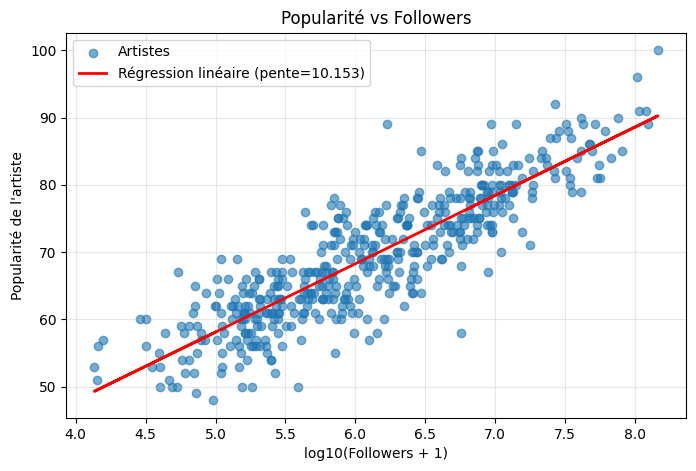

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr, spearmanr, linregress

df = pd.DataFrame(artistes)

df['followers_log'] = np.log10(df['followers'] + 1) 

#Construction de la regression linéaire
pente, ord_origine, r_value, p_value, std_err = linregress(df['followers_log'], df['popularite'])
y_pred = pente * df['followers_log'] + ord_origine

plt.figure(figsize=(8,5))
plt.scatter(df['followers_log'], df['popularite'], alpha=0.6, label='Artistes')
plt.plot(df['followers_log'], y_pred, color='red', linewidth=2,
         label=f'Régression linéaire (pente={pente:.3f})')
plt.xlabel("log10(Followers + 1)")
plt.ylabel("Popularité de l'artiste")
plt.title("Popularité vs Followers")
plt.grid(True, alpha=0.3)
plt.legend()

# corrélations
pearson_corr, pearson_p = pearsonr(df['followers_log'], df['popularite'])
spearman_corr, spearman_p = spearmanr(df['followers'], df['popularite'])  

print(f"Pearson (sur log followers) : r={pearson_corr:.3f}, p={pearson_p:.3e}")
print(f"Spearman (rangs)           : rho={spearman_corr:.3f}, p={spearman_p:.3e}")


Le graphique met en évidence une tendance clairement ascendante : les points représentant les artistes montrent que la popularité augmente avec le nombre de followers. La droite rouge de régression linéaire, avec une pente d’environ 10,15, illustre bien cette relation positive et traduit une forte croissance de la popularité lorsque le nombre de followers augmente.

Le coefficient de corrélation de Pearson (r = 0,873) indique une corrélation linéaire très forte et hautement significative entre la popularité et le logarithme du nombre de followers. Cela signifie que la relation est non seulement positive, mais aussi stable statistiquement. Cela signifie que, même si on changeait légèrement l’échantillon d’artistes, on observerait très probablement le même type de relation.

Le coefficient de Spearman (ρ = 0,873) confirme ce lien fort, même sans supposer de linéarité stricte. Il montre que la relation est monotone : les artistes ayant plus de followers ont presque toujours une popularité plus élevée, ce qui renforce la conclusion d’une dépendance nette entre ces deux variables.

#### La popularité d’un artiste est-elle corrélée à la popularité de ses tracks ? 

Pearson (sur log followers) : r=0.406, p=4.175e-20
Spearman (rangs)           : rho=0.873, p=1.146e-147


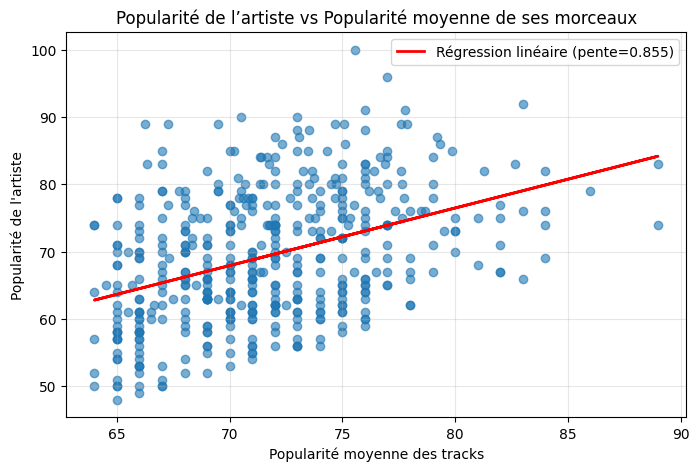

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

df_artists = pd.DataFrame(artistes)
df_tracks = pd.DataFrame(all_tracks)

mean_pop_by_artist = (
    df_tracks.groupby("artist")["popularity"]
    .mean()
    .reset_index()
    .rename(columns={"popularity": "popularite_moyenne_tracks"})
)

df_full = pd.merge(df_artists, mean_pop_by_artist, left_on="nom", right_on="artist", how="inner")

pente, ord_origine, r_value, p_value, std_err = linregress(df_full["popularite_moyenne_tracks"], df_full['popularite'])
y_pred = pente * df_full["popularite_moyenne_tracks"] + ord_origine

plt.figure(figsize=(8,5))
plt.scatter(df_full["popularite_moyenne_tracks"], df_full["popularite"], alpha=0.6)
plt.plot(df_full["popularite_moyenne_tracks"], y_pred, color='red', linewidth=2,
         label=f'Régression linéaire (pente={pente:.3f})')
plt.xlabel("Popularité moyenne des tracks")
plt.ylabel("Popularité de l'artiste")
plt.title("Popularité de l’artiste vs Popularité moyenne de ses morceaux")
plt.grid(True, alpha=0.3)
plt.legend()

# corrélations
pearson_corr, pearson_p = pearsonr(df_full["popularite_moyenne_tracks"], df_full['popularite'])
spearman_corr, spearman_p = spearmanr(df_full['followers'], df_full['popularite']) 

print(f"Pearson (sur log followers) : r={pearson_corr:.3f}, p={pearson_p:.3e}")
print(f"Spearman (rangs)           : rho={spearman_corr:.3f}, p={spearman_p:.3e}")


Le graphique montre une légère tendance ascendante : la popularité de l’artiste augmente globalement avec la popularité moyenne de ses morceaux. Cependant, les points sont assez dispersés, indiquant que la relation n’est pas très forte. La droite rouge de régression linéaire (pente ≈ 0,855) traduit tout de même une corrélation positive entre les deux variables.

Le coefficient de Pearson (r = 0,406) révèle une corrélation linéaire modérée mais significative. Cela signifie qu’il existe bien une relation entre la popularité moyenne des morceaux et celle de l’artiste, mais que cette relation est moins forte et moins stable que celle observée avec le nombre de followers.

En revanche, le coefficient de Spearman (ρ = 0,873) montre une corrélation de rangs très forte, indiquant que la relation est monotone : les artistes dont les morceaux sont globalement plus populaires ont presque toujours une popularité plus élevée.

#### Y a-t-il une évolution des genres les plus écoutés entre 2020 et 2024 ?

In [77]:
#Enumération des genres
genres = []
nombres = []

for artist in artistes:
    artist_genres = artist.get("genres", []) or []
    for j in range(len(artist_genres)):
        artist_genres[j] = artist_genres[j].strip().lower()

        if artist_genres[j] not in genres:
            genres.append(artist_genres[j])
            nombres.append([0,0,0,0,0])

In [82]:
print(nombres)

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 

In [78]:
dictionnaire_annee = {
    2020: 0,
    2021: 1,        
    2022: 2,
    2023: 3,
    2024: 4
}

In [90]:
for trackinf in tracks_info:
    date = trackinf.get("release_date", "")
    try:
        year = int(str(date).split("-")[0])
    except Exception:
        continue

    if year not in dictionnaire_annee:
        continue

    artist_name = (trackinf.get("artist_name") or "").strip()

    artist_entry = next(
        (a for a in artistes if (a.get("nom") or "").strip().lower() == artist_name.lower()),
        None
    )
    artist_genres = (artist_entry.get("genres") if artist_entry else []) or []


    for k in range(len(artist_genres)):
        artist_genres[k] = artist_genres[k].strip().lower()
        if artist_genres[k] in genres:
            genre_idx = genres.index(artist_genres[k])
            year_idx = dictionnaire_annee[year]
            nombres[genre_idx][year_idx] += 1

In [91]:
print(nombres)

[[4, 5, 1, 1, 9], [5, 0, 0, 0, 9], [6, 0, 0, 0, 0], [6, 2, 3, 2, 0], [1, 2, 0, 0, 0], [28, 26, 36, 46, 30], [10, 0, 3, 6, 0], [18, 0, 2, 3, 15], [19, 12, 15, 26, 16], [2, 6, 1, 0, 1], [1, 0, 0, 0, 0], [2, 5, 0, 0, 0], [2, 5, 0, 0, 1], [5, 0, 0, 0, 0], [4, 0, 2, 0, 0], [4, 0, 0, 0, 0], [4, 8, 1, 2, 0], [19, 10, 25, 4, 5], [2, 3, 4, 4, 0], [11, 6, 17, 9, 4], [2, 5, 4, 5, 1], [2, 7, 4, 5, 11], [7, 0, 0, 0, 0], [1, 2, 0, 0, 0], [1, 1, 0, 3, 0], [4, 3, 5, 1, 2], [1, 0, 2, 1, 0], [5, 3, 6, 2, 2], [6, 3, 6, 2, 2], [4, 2, 1, 0, 2], [5, 3, 6, 2, 2], [1, 0, 1, 1, 0], [1, 0, 0, 0, 0], [2, 4, 9, 12, 9], [2, 3, 2, 5, 1], [3, 2, 3, 6, 1], [1, 0, 0, 0, 0], [1, 0, 0, 1, 0], [2, 0, 0, 0, 0], [2, 0, 0, 0, 0], [1, 0, 0, 0, 0], [2, 1, 6, 2, 0], [2, 0, 0, 1, 0], [3, 0, 2, 1, 0], [2, 1, 6, 2, 0], [1, 1, 1, 1, 2], [2, 0, 0, 0, 0], [2, 2, 0, 3, 2], [2, 1, 2, 0, 0], [1, 0, 0, 0, 0], [1, 3, 2, 2, 1], [1, 0, 1, 0, 1], [1, 6, 8, 3, 2], [2, 2, 3, 0, 0], [2, 5, 2, 3, 2], [1, 1, 0, 0, 0], [3, 0, 0, 1, 1], [1, 3, 1, 

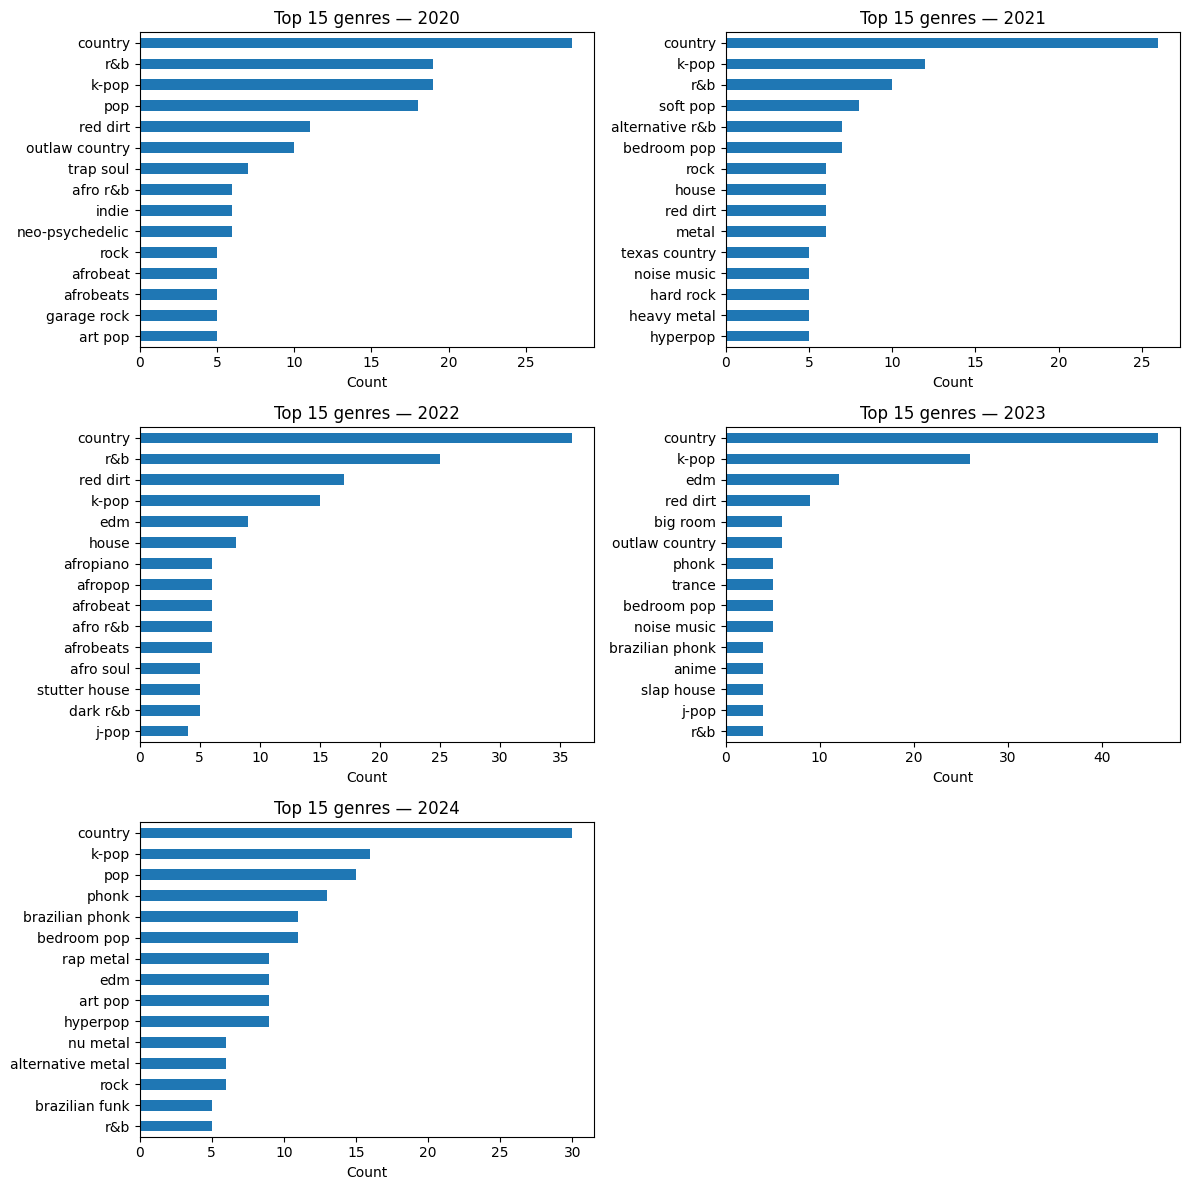

In [ ]:
years = sorted(dictionnaire_annee.keys()) 

df_genres = pd.DataFrame(nombres, index=genres, columns=years)
totals_by_year = df_genres.sum(axis=0)

# extraire les top-15 genres pour chaque année
top15_by_year = {}
for y in years:
    top15 = df_genres[y].nlargest(15).reset_index()
    top15.columns = ["genre", "count"]
    top15["year"] = y
    top15["share_pct"] = (top15["count"] / totals_by_year[y]) * 100
    top15_by_year[y] = top15

# concaténer tous les top-15 dans un seul DataFrame
top15_each_year = pd.concat(top15_by_year.values(), ignore_index=True)

n_cols = 2
n_rows = int(np.ceil(len(years) / n_cols))
plt.figure(figsize=(12, 4 * n_rows))
for i, y in enumerate(years, 1):
    ax = plt.subplot(n_rows, n_cols, i)
    top15 = df_genres[y].nlargest(15).sort_values()
    top15.plot(kind='barh', ax=ax, color='C0')
    ax.set_title(f"Top 15 genres — {y}")
    ax.set_xlabel("Count")
plt.tight_layout()
plt.show()


Entre 2020 et 2024, le paysage musical a connu des transformations majeures. La musique country reste incontestablement au sommet, conservant sa première place sur toute la période. La K-pop confirme son ascension, passant de la troisième à la deuxième position.
Le changement le plus frappant concerne le R&B, qui s'effondre de la deuxième place en 2020 à la quinzième en 2024. 
Cette chute a ouvert la voie à de nouveaux sous-genres émergents. Le phonk et le brazilian phonk s'imposent désormais dans le top 5, aux côtés de styles expérimentaux comme le bedroom pop, le hyperpop et le rap metal.